# Лабораторная работа №1.

По курсу "Нейронные сети глубокого обучения"

Выполнили студенты группы 6131:
- Смирнов И.Д.
- Матюшкина И.В.

## Задание:
Для любителей прекрасного. Релизовать нейронную сеть, которая будет являться классификатором для датасета представленного ниже. 

### Датасет:

https://www.kaggle.com/alxmamaev/flowers-recognition


### О датасете:

Этот набор данных содержит 4242 изображения цветов.
Сбор данных основан на данных flicr, google images, yandex images.
Вы можете использовать этот набор данных, чтобы распознавать растения на фотографии.

#### Содержание датасета
Картинки разделены на пять классов: ромашки, тюльпаны, розы, подсолнухи, одуванчики.
На каждый класс около 800 фотографий. Фотографии не высокого разрешения, около 320х240 пикселей. Фотографии не уменьшены до единого размера, у них разные пропорции!

Классифифкация

1. ромашки
2. розы
3. тюльпаны
4. подсолнухи
5. одуванчики

В качестве классификатора будут использоваться многослойный персептрон и свёрточная нейронные сети для различных 

## Загрузка данных

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"ismirnov56","key":"4443d5196fd2eebbc7b62bc8b480d636"}'}

In [ ]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                        2022 Ukraine Russia War                              2KB  2022-03-31 09:44:51           3666        234  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021           Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           3473        102  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease    Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           6215        133  1.0              
datasets/vivek468/superstore-dataset-final                  

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

flowers-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
root_data_path = 'flowers/'

In [ ]:
import os

CLASSES = os.listdir(root_data_path)

In [ ]:
FILES_MAPPING = {
    'sunflower': 'подсолнух',
    'dandelion': 'одуванчик',
    'daisy': 'маргаритка', 
    'tulip': 'тюльпан',
    'rose': 'роза'
}

In [ ]:
from PIL import Image
import numpy
import cv2
IMAGE_DIM = 150, 150


train = []  

for i in CLASSES:
    path = os.path.join(root_data_path, i)
    idx = CLASSES.index(i)
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_array = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array, IMAGE_DIM)
            train.append([img_array, idx])

In [ ]:
X=[] #Training images
y=[] #labels
for i,j in train:
    X.append(i)
    y.append(j)

In [ ]:
del train

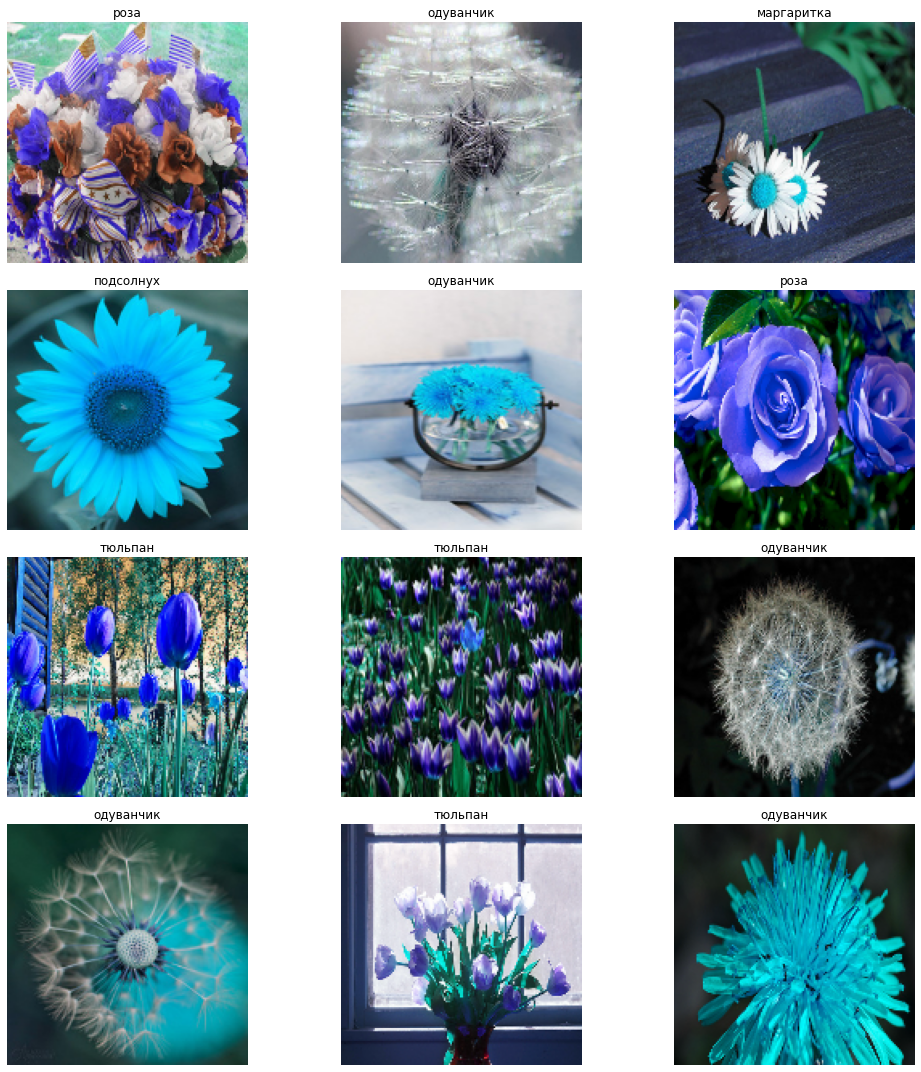

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ROWS = 4
COLS = 3

fig,ax = plt.subplots(ROWS, COLS)
fig.set_size_inches(15,15)

for i in range(ROWS):
    for j in range(COLS):
        l = np.random.randint(0, len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title(FILES_MAPPING[CLASSES[y[l]]])
        ax[i,j].axis('off')        
plt.tight_layout()

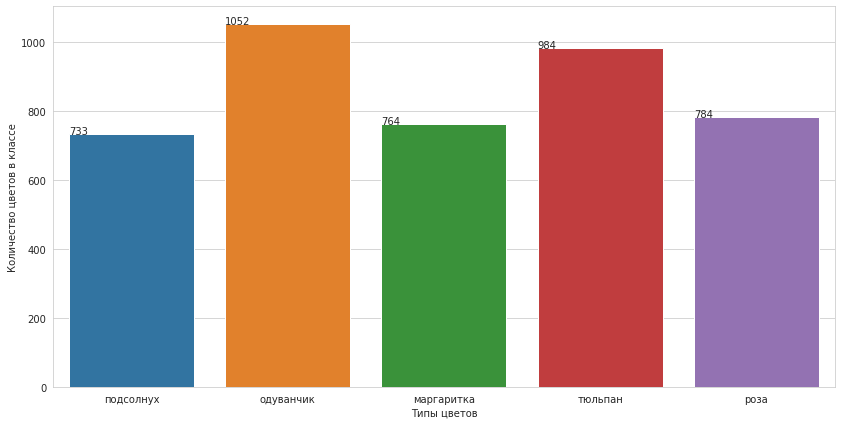

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize = (14,7))
fig = sns.countplot(x = y)
fig.set(xticks = range(len(CLASSES)), xticklabels = [FILES_MAPPING[i] for i in CLASSES])
plt.xlabel('Типы цветов')
plt.ylabel('Количество цветов в классе')

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()